### Step 1: (Windows) Read CSV File and Define dates

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

import tkinter as tk
from tkinter import filedialog, messagebox

#Ref GUI to get file: https://www.geeksforgeeks.org/read-a-text-file-using-python-tkinter/
file = tk.Tk()
file.withdraw()

file_path = filedialog.askopenfilename(
    title="Select a CSV file to load",
    filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
)

# Load the CSV file into a new DataFrame
combined_df_2022 = pd.read_csv(file_path)


### Step 1: (Mac) Read CSV File and Define dates

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

file_path = 'appliances_2022.csv'
# Load the CSV file into a new DataFrame
combined_df_2022 = pd.read_csv(file_path)


### Step 2: Process data and assign Vader Score

In [6]:

# Step 1: Define date range and filter data
start_date = '01-01-2022'
end_date = '12-31-2022'
combined_df_2022['date'] = pd.to_datetime(combined_df_2022['date'])

#Filter dataset based on start and end date
filtered_df = combined_df_2022[(combined_df_2022['date'] >= start_date) & (combined_df_2022['date'] <= end_date)]

file.destroy()
# Step 2: Create 'week_start_date' column
filtered_df['week_start_date'] = filtered_df['date'] - pd.to_timedelta(filtered_df['date'].dt.weekday, unit='d')

# Step 3: Compute sentiment scores
filtered_df['text'] = filtered_df['text'].astype(str).fillna('')
# Step 4: Generate VADER Sent Analyizer
sentiment_analyzer = SentimentIntensityAnalyzer()
tqdm.pandas()
#Step 5 Apply polarity score ref: https://www.kirenz.com/blog/posts/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/#polarity-scores
filtered_df[['neg', 'neu', 'pos', 'compound']] = filtered_df['text'].progress_apply(lambda x: pd.Series(sentiment_analyzer.polarity_scores(x)))


  0%|          | 0/299487 [00:00<?, ?it/s]

### Step 3 Visualization Full Year

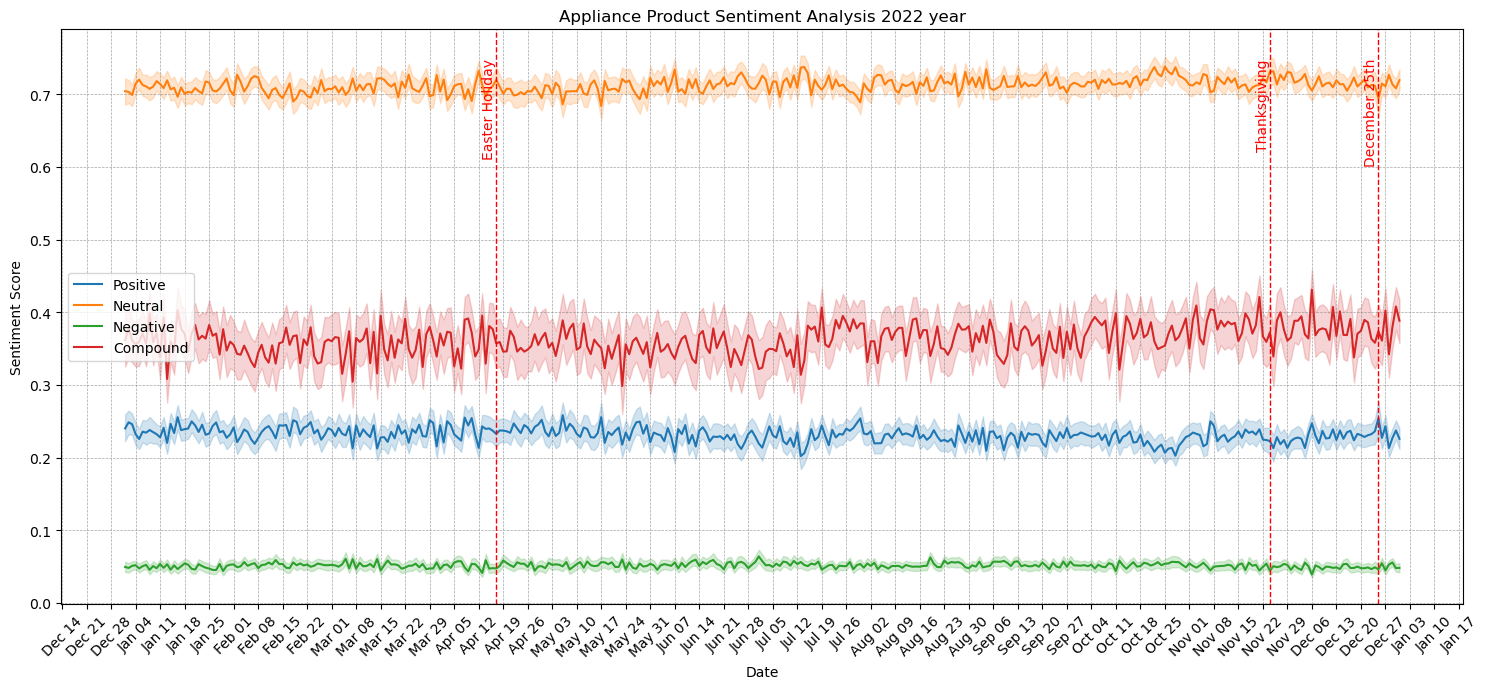

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Ensure your 'date' column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Step 4: Visualize the results (now day-by-day)
plt.figure(figsize=(15, 7))

# Step 5: Plotings each sentiment score over the date column
sns.lineplot(data=filtered_df, x='date', y='pos', label='Positive')
sns.lineplot(data=filtered_df, x='date', y='neu', label='Neutral')
sns.lineplot(data=filtered_df, x='date', y='neg', label='Negative')
sns.lineplot(data=filtered_df, x='date', y='compound', label='Compound')

# Add light grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Step 6 Highlight December 25th (Christmas), Easter and Thanksgiving
dec25 = pd.to_datetime('2022-12-25')
thanksgiving = pd.to_datetime('2022-11-24') 
easter = pd.to_datetime('2022-04-17')  
# Add vertical lines at the specified dates
plt.axvline(x=easter, color='red', linestyle='--', linewidth=1)
plt.axvline(x=thanksgiving, color='red', linestyle='--', linewidth=1)
plt.axvline(x=dec25, color='red', linestyle='--', linewidth=1)



# Step 7: Add annotations for the dates
plt.text(easter, plt.ylim()[1]*0.95, 'Easter Holiday', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')
plt.text(thanksgiving, plt.ylim()[1]*0.95, 'Thanksgiving', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')
plt.text(dec25, plt.ylim()[1]*0.95, 'December 25th', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')

# Date Formatter ref https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Appliance Product Sentiment Analysis 2022 year')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()


### Repeating the steps to generate Pet Supplies Charts

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

file_path = 'pet_supplies_2022.csv'
# Load the CSV file into a new DataFrame
pet_supplies_2022 = pd.read_csv(file_path)


In [11]:

# Step 1: Define date range and filter data
pet_supplies_2022['date'] = pd.to_datetime(pet_supplies_2022['date'])

#Filter dataset based on start and end date
filtered_df = pet_supplies_2022[(pet_supplies_2022['date'] >= start_date) & (pet_supplies_2022['date'] <= end_date)]

# Step 2: Create 'week_start_date' column
filtered_df['week_start_date'] = filtered_df['date'] - pd.to_timedelta(filtered_df['date'].dt.weekday, unit='d')

# Step 3: Compute sentiment scores
filtered_df['text'] = filtered_df['text'].astype(str).fillna('')
# Step 4: Generate VADER Sent Analyizer
sentiment_analyzer = SentimentIntensityAnalyzer()
tqdm.pandas()
#Step 5 Apply polarity score ref: https://www.kirenz.com/blog/posts/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/#polarity-scores
filtered_df[['neg', 'neu', 'pos', 'compound']] = filtered_df['text'].progress_apply(lambda x: pd.Series(sentiment_analyzer.polarity_scores(x)))


  0%|          | 0/2374142 [00:00<?, ?it/s]

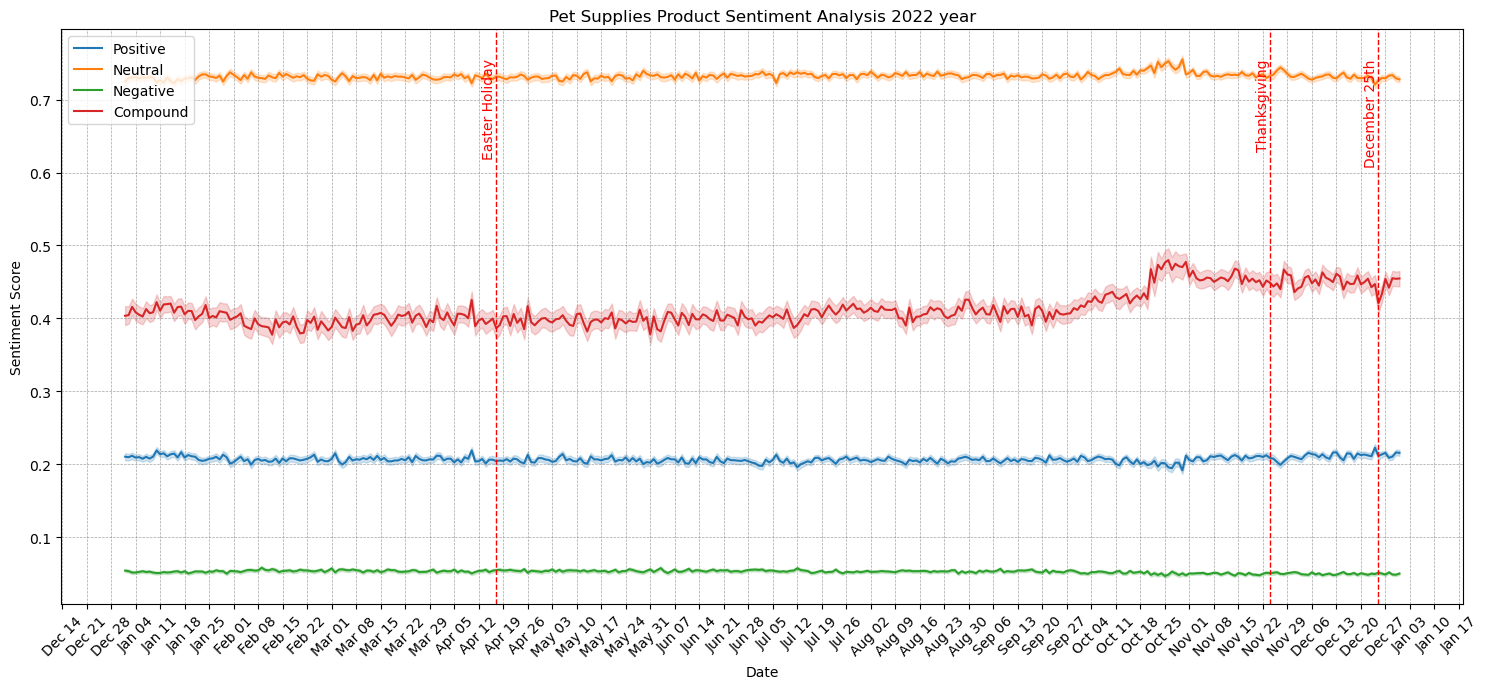

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Ensure your 'date' column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Step 4: Visualize the results (now day-by-day)
plt.figure(figsize=(15, 7))

# Step 5: Plotings each sentiment score over the date column
sns.lineplot(data=filtered_df, x='date', y='pos', label='Positive')
sns.lineplot(data=filtered_df, x='date', y='neu', label='Neutral')
sns.lineplot(data=filtered_df, x='date', y='neg', label='Negative')
sns.lineplot(data=filtered_df, x='date', y='compound', label='Compound')

# Add light grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Step 6 Highlight December 25th (Christmas), Easter and Thanksgiving
dec25 = pd.to_datetime('2022-12-25')
thanksgiving = pd.to_datetime('2022-11-24') 
easter = pd.to_datetime('2022-04-17')  
# Add vertical lines at the specified dates
plt.axvline(x=easter, color='red', linestyle='--', linewidth=1)
plt.axvline(x=thanksgiving, color='red', linestyle='--', linewidth=1)
plt.axvline(x=dec25, color='red', linestyle='--', linewidth=1)



# Step 7: Add annotations for the dates
plt.text(easter, plt.ylim()[1]*0.95, 'Easter Holiday', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')
plt.text(thanksgiving, plt.ylim()[1]*0.95, 'Thanksgiving', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')
plt.text(dec25, plt.ylim()[1]*0.95, 'December 25th', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')

# Date Formatter ref https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Pet Supplies Product Sentiment Analysis 2022 year')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()


### Repeating the steps to generate Toys and Games Charts

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

file_path = 'toys_and_games_year_2022.csv'
# Load the CSV file into a new DataFrame
toys_and_games_2022 = pd.read_csv(file_path)


In [15]:

# Step 1: Define date range and filter data
toys_and_games_2022['date'] = pd.to_datetime(toys_and_games_2022['date'])

#Filter dataset based on start and end date
filtered_df = toys_and_games_2022[(toys_and_games_2022['date'] >= start_date) & (toys_and_games_2022['date'] <= end_date)]

# Step 2: Create 'week_start_date' column
filtered_df['week_start_date'] = filtered_df['date'] - pd.to_timedelta(filtered_df['date'].dt.weekday, unit='d')

# Step 3: Compute sentiment scores
filtered_df['text'] = filtered_df['text'].astype(str).fillna('')
# Step 4: Generate VADER Sent Analyizer
sentiment_analyzer = SentimentIntensityAnalyzer()
tqdm.pandas()
#Step 5 Apply polarity score ref: https://www.kirenz.com/blog/posts/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/#polarity-scores
filtered_df[['neg', 'neu', 'pos', 'compound']] = filtered_df['text'].progress_apply(lambda x: pd.Series(sentiment_analyzer.polarity_scores(x)))


  0%|          | 0/2046193 [00:00<?, ?it/s]

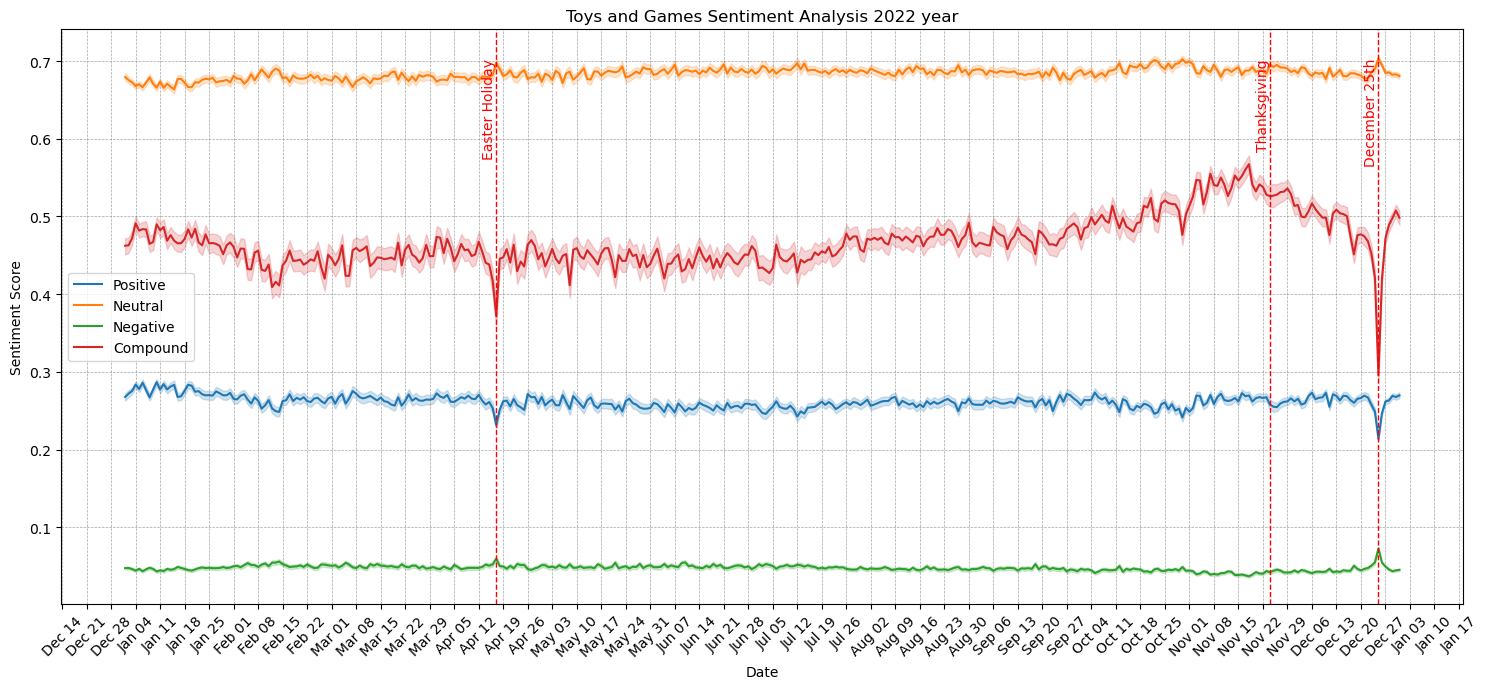

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Ensure your 'date' column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Step 4: Visualize the results (now day-by-day)
plt.figure(figsize=(15, 7))

# Step 5: Plotings each sentiment score over the date column
sns.lineplot(data=filtered_df, x='date', y='pos', label='Positive')
sns.lineplot(data=filtered_df, x='date', y='neu', label='Neutral')
sns.lineplot(data=filtered_df, x='date', y='neg', label='Negative')
sns.lineplot(data=filtered_df, x='date', y='compound', label='Compound')

# Add light grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Step 6 Highlight December 25th (Christmas), Easter and Thanksgiving
dec25 = pd.to_datetime('2022-12-25')
thanksgiving = pd.to_datetime('2022-11-24') 
easter = pd.to_datetime('2022-04-17')  
# Add vertical lines at the specified dates
plt.axvline(x=easter, color='red', linestyle='--', linewidth=1)
plt.axvline(x=thanksgiving, color='red', linestyle='--', linewidth=1)
plt.axvline(x=dec25, color='red', linestyle='--', linewidth=1)



# Step 7: Add annotations for the dates
plt.text(easter, plt.ylim()[1]*0.95, 'Easter Holiday', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')
plt.text(thanksgiving, plt.ylim()[1]*0.95, 'Thanksgiving', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')
plt.text(dec25, plt.ylim()[1]*0.95, 'December 25th', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')

# Date Formatter ref https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Toys and Games Sentiment Analysis 2022 year')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()


### Repeating the steps to generate Amazon Fashion Products

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

file_path = 'amazon_fashion_2022.csv'
# Load the CSV file into a new DataFrame
amazon_fashion_2022 = pd.read_csv(file_path)


In [19]:

# Step 1: Define date range and filter data
amazon_fashion_2022['date'] = pd.to_datetime(amazon_fashion_2022['date'])

#Filter dataset based on start and end date
filtered_df = amazon_fashion_2022[(amazon_fashion_2022['date'] >= start_date) & (amazon_fashion_2022['date'] <= end_date)]

# Step 2: Create 'week_start_date' column
filtered_df['week_start_date'] = filtered_df['date'] - pd.to_timedelta(filtered_df['date'].dt.weekday, unit='d')

# Step 3: Compute sentiment scores
filtered_df['text'] = filtered_df['text'].astype(str).fillna('')
# Step 4: Generate VADER Sent Analyizer
sentiment_analyzer = SentimentIntensityAnalyzer()
tqdm.pandas()
#Step 5 Apply polarity score ref: https://www.kirenz.com/blog/posts/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/#polarity-scores
filtered_df[['neg', 'neu', 'pos', 'compound']] = filtered_df['text'].progress_apply(lambda x: pd.Series(sentiment_analyzer.polarity_scores(x)))


  0%|          | 0/173972 [00:00<?, ?it/s]

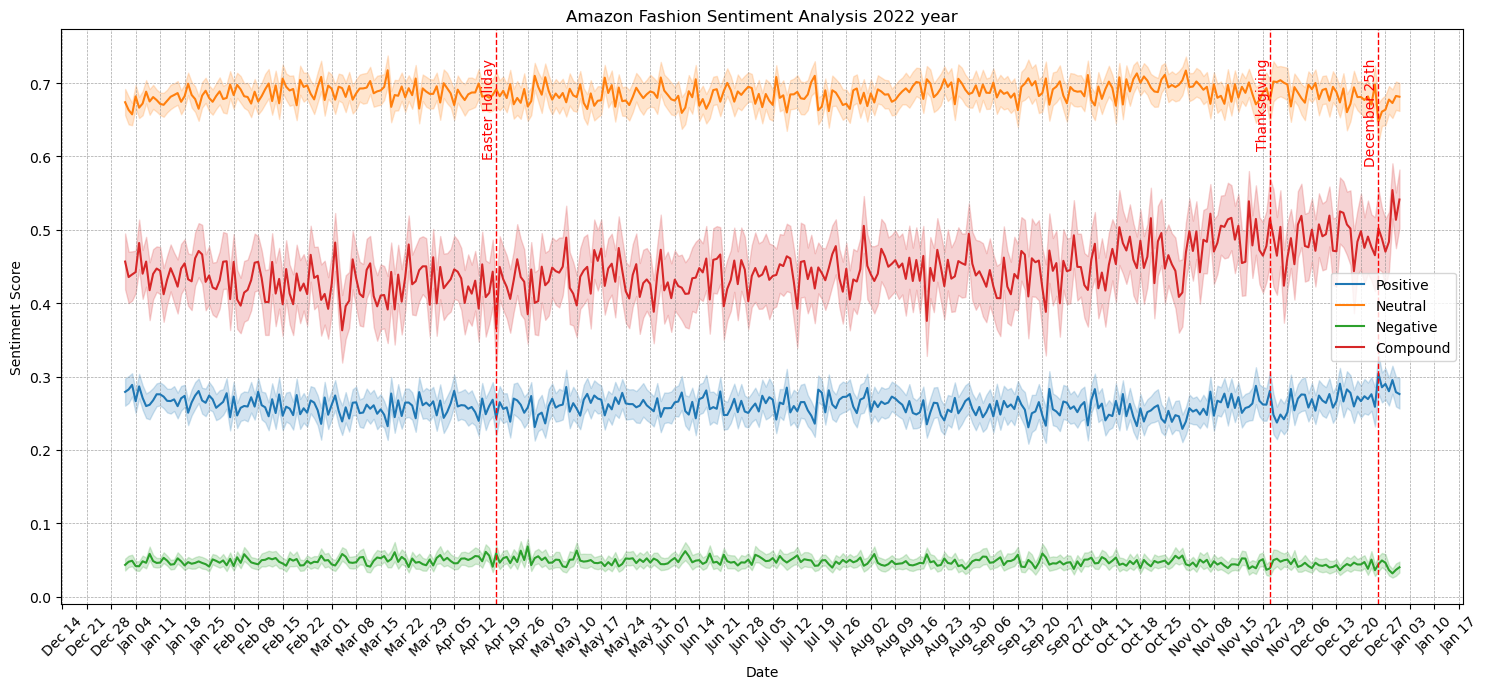

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Ensure your 'date' column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Step 4: Visualize the results (now day-by-day)
plt.figure(figsize=(15, 7))

# Step 5: Plotings each sentiment score over the date column
sns.lineplot(data=filtered_df, x='date', y='pos', label='Positive')
sns.lineplot(data=filtered_df, x='date', y='neu', label='Neutral')
sns.lineplot(data=filtered_df, x='date', y='neg', label='Negative')
sns.lineplot(data=filtered_df, x='date', y='compound', label='Compound')

# Add light grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Step 6 Highlight December 25th (Christmas), Easter and Thanksgiving
dec25 = pd.to_datetime('2022-12-25')
thanksgiving = pd.to_datetime('2022-11-24') 
easter = pd.to_datetime('2022-04-17')  
# Add vertical lines at the specified dates
plt.axvline(x=easter, color='red', linestyle='--', linewidth=1)
plt.axvline(x=thanksgiving, color='red', linestyle='--', linewidth=1)
plt.axvline(x=dec25, color='red', linestyle='--', linewidth=1)



# Step 7: Add annotations for the dates
plt.text(easter, plt.ylim()[1]*0.95, 'Easter Holiday', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')
plt.text(thanksgiving, plt.ylim()[1]*0.95, 'Thanksgiving', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')
plt.text(dec25, plt.ylim()[1]*0.95, 'December 25th', rotation=90, color='red',
         verticalalignment='top', horizontalalignment='right')

# Date Formatter ref https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Amazon Fashion Sentiment Analysis 2022 year')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()
